In [22]:
%load_ext autoreload
%autoreload 2

from cd_ann3 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
def load(filename):
    with open(filename, 'rb') as f:
        return pkl.load(f)

In [19]:
d = load('ga-pop.pkl')

In [20]:
d

(['pop_size'],
 {(400,): (NeuralNetwork(algorithm='genetic_alg', clip_max=1.5, curve=True,
                 early_stopping=True, hidden_nodes=[6], learning_rate=1e-06,
                 max_attempts=50, max_iters=400, pop_size=400, random_state=3),
   0.6282066366521207,
   0.6090946749359674),
  (600,): (NeuralNetwork(algorithm='genetic_alg', clip_max=1.5, curve=True,
                 early_stopping=True, hidden_nodes=[6], learning_rate=1e-06,
                 max_attempts=50, max_iters=400, pop_size=600, random_state=3),
   0.6698898257293371,
   0.6646093791421188),
  (800,): (NeuralNetwork(algorithm='genetic_alg', clip_max=1.5, curve=True,
                 early_stopping=True, hidden_nodes=[6], learning_rate=1e-06,
                 max_attempts=50, max_iters=400, pop_size=800, random_state=3),
   0.645449324076357,
   0.6310671383024602)})

In [32]:
gd = train_gd(0.8e-5)

In [3]:
rhc = train_rhc(learning_rate=0.45, restarts=10)

In [4]:
sa = train_sa(T=1, decay=0.8)

In [42]:
ga = train_ga(pop_size=300, max_iters=1000, clip_max=1.5, early_stopping=True)

In [49]:
ga = load('ga200.pkl')

In [23]:
ga = train_ga(pop_size=200, max_iters=3000, early_stopping=False)

In [45]:
ga

(NeuralNetwork(algorithm='genetic_alg', clip_max=1.5, curve=True,
               elite_dreg_ratio=None, hidden_nodes=[6], learning_rate=0.2,
               max_iters=2000, mutation_prob=0.05, pop_size=300, random_state=3),
 0.439330934915666,
 0.437464841552597)

In [50]:
ga[0].fitness_curve[-1]

0.42916363339427166

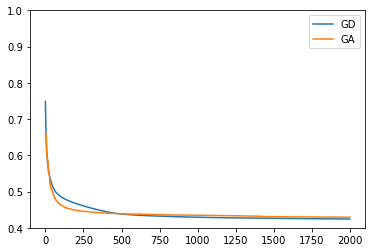

In [52]:
plt.figure()
plt.plot(-gd[0].fitness_curve, label='GD')
#plt.plot(rhc[0].fitness_curve, label='RHC')
#plt.plot(sa[0].fitness_curve, label='SA')
plt.plot(ga[0].fitness_curve, label='GA')
plt.ylim([0.4, 1.0])
plt.legend()


In [100]:
rhc

(NeuralNetwork(curve=True, early_stopping=True, hidden_nodes=[6],
               learning_rate=0.45, max_attempts=100, max_iters=1500,
               random_state=3, restarts=10),
 0.6783911644528836,
 0.6749588281182283)

In [79]:
sum(gd[0].fitted_weights**2)


26.716102702331792

In [38]:
max(gd[0].fitted_weights)

1.5205917197393413

In [20]:
sum(ga[0].fitted_weights**2)

64.52546463001723

In [99]:
sum(sa[0].fitted_weights**2)

91.57042282884657

In [70]:
sum(rhc[0].fitted_weights**2)

136.02201639465198

In [34]:
gd

(NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
               early_stopping=True, hidden_nodes=[6], learning_rate=8e-06,
               max_attempts=100, max_iters=2000, random_state=3),
 0.683993801095735,
 0.683171136711555)

In [16]:
ga


(NeuralNetwork(algorithm='genetic_alg', clip_max=1.5, curve=True,
               early_stopping=True, hidden_nodes=[6], learning_rate=0.2,
               max_iters=1000, pop_size=600, random_state=3),
 0.5423158191357755,
 0.5396298914324036)

In [10]:
rhc

(NeuralNetwork(clip_max=1.5, curve=True, early_stopping=True, hidden_nodes=[6],
               learning_rate=0.45, max_attempts=100, max_iters=2000,
               random_state=3, restarts=10),
 0.673394118834455,
 0.668135138289182)

In [11]:
sa

(NeuralNetwork(algorithm='simulated_annealing', clip_max=1.5, curve=True,
               early_stopping=True, hidden_nodes=[6], learning_rate=0.3,
               max_attempts=100, max_iters=2000, random_state=8, restarts=10,
               schedule=GeomDecay(init_temp=1, decay=0.8, min_temp=0.0001)),
 0.6795888321145164,
 0.6792565306268046)

In [86]:
sa[0].fitness_curve[-1]

0.44542800797376625

In [87]:
ga[0].fitness_curve[-1]

0.4574224980498374

In [88]:
gd[0].fitness_curve[-1]

-0.45668276670272395

In [89]:
rhc[0].fitness_curve[-1]

0.4291824523548031